In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

In [ ]:
n_samples = 10_000
data, _ = make_swiss_roll(n_samples)
data = data[:, [2, 0]] / 10
data = data * np.array([1, -1])

(-2.0, 2.0)

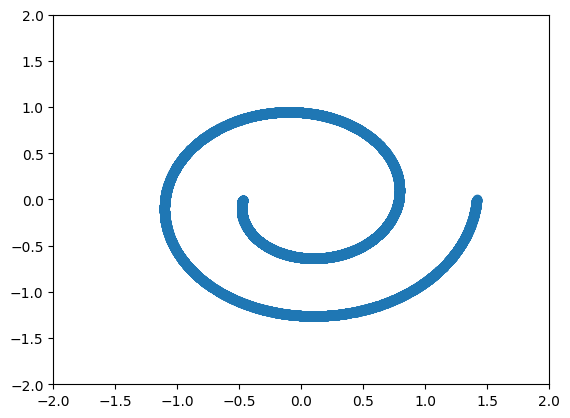

In [ ]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])

In [ ]:
def forward_process(data, T, betas):
    for t in range(T):
        beta_t = betas[t]
        mu = data * torch.sqrt(1 - beta_t)
        std = torch.sqrt(beta_t)
        # Sample from q(x_t | x_{t-1})
        data = mu + torch.randn_like(data) * std # data ~ N(mu, std)
    return data

In [ ]:
T = 50
betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5
xT = forward_process(torch.from_numpy(data), T, betas)

In [ ]:
print(xT.mean(0))
print(xT.std(0))

tensor([ 0.0037, -0.0090], dtype=torch.float64)
tensor([1.0067, 1.0091], dtype=torch.float64)


(-2.0, 2.0)

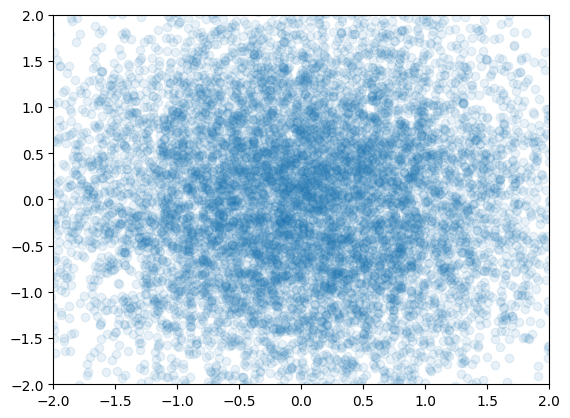

In [ ]:
plt.scatter(xT[:, 0].data.numpy(), xT[:, 1].data.numpy(), alpha=0.1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])

### Kernel Trick Implementation

In [ ]:
class DiffusionModel():

    def __init__(self, T):

        self.betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5
        self.alphas = 1 - self.betas
        self.alphas_bar = torch.cumprod(self.alphas, 0)

    def forward_process(self, x0, t):
        """
        :param t: Number of diffusion steps
        """

        assert t > 0, 't should be greater than 0'

        t = t -1 # Because we start indexing at 0

        mu = torch.sqrt(self.alphas_bar[t]) * x0
        std = torch.sqrt(1 - self.alphas_bar[t])
        epsilon = torch.randn_like(x0)

        return mu + epsilon * std # data ~ N(mu, std)

In [ ]:
model = DiffusionModel(50)
x0 = torch.from_numpy(data)
xT = model.forward_process(x0, 20)

(-2.0, 2.0)

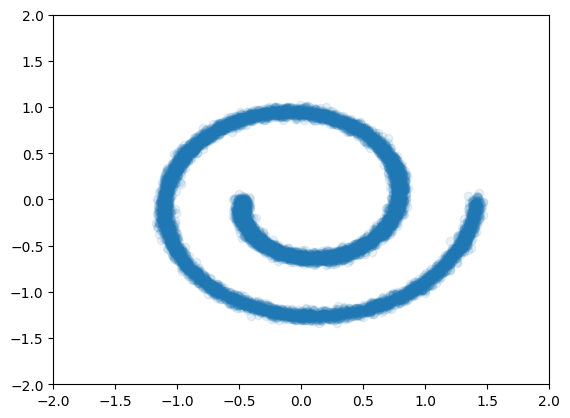

In [ ]:
plt.scatter(xT[:, 0].data.numpy(), xT[:, 1].data.numpy(), alpha=0.1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])

### Visualization

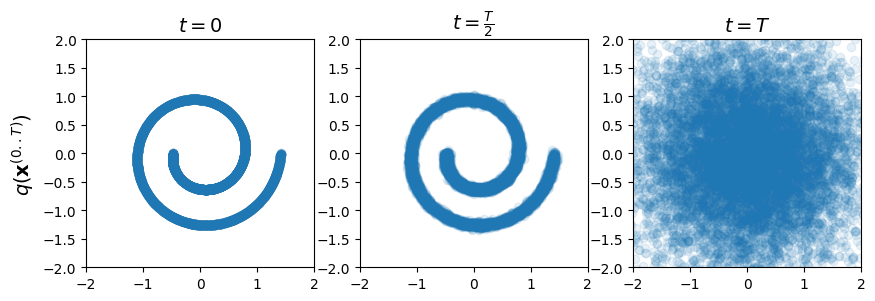

In [ ]:
fontsize = 14
fig = plt.figure(figsize=(10, 3))

data = [x0, model.forward_process(x0, 20), model.forward_process(x0, 40)]
for i in range(3):

    plt.subplot(1, 3, 1+i)
    plt.scatter(data[i][:, 0].data.numpy(), data[i][:, 1].data.numpy(), alpha=0.1)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.gca().set_aspect('equal')

    if i == 0: plt.ylabel(r'$q(\mathbf{x}^{(0..T)})$', fontsize=fontsize)
    if i == 0: plt.title(r'$t=0$', fontsize=fontsize)
    if i == 1: plt.title(r'$t=\frac{T}{2}$', fontsize=fontsize)
    if i == 2: plt.title(r'$t=T$', fontsize=fontsize)
plt.savefig('forward_process.png', bbox_inches='tight')